INSTALASI PUSTAKA

In [ ]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 45.2 MB/s eta 0:00:00


SUMBER DATA KE 1 = EKSTRAK PDF DARI BPS

In [ ]:
import pdfplumber
import pandas as pd

pdf_path = "/content/statistik-indonesia-2025.pdf"
output_csv = "ipm sudah ekstrak.csv"

target_page_pdf = 364

extracted_data = []

print(f"Mengekstrak Data Tabel dari halaman file PDF ke-{target_page_pdf}...")

try:
    with pdfplumber.open(pdf_path) as pdf:
        if target_page_pdf <= len(pdf.pages):
            page = pdf.pages[target_page_pdf - 1]
            table = page.extract_table()

            if table:
                for row in table:
                    if row and len(row) >= 4:
                        provinsi = row[0]
                        nilai_2023 = row[3]

                        if not provinsi:
                            continue

                        if "Provinsi" in provinsi or "Province" in provinsi:
                            continue

                        print(f"Mengambil: {provinsi} | {nilai_2023}")
                        extracted_data.append([provinsi, nilai_2023])
            else:
                print("Tabel tidak terdeteksi secara otomatis pada halaman ini.")
        else:
            print("Nomor halaman melebihi jumlah halaman PDF.")

    if extracted_data:
        df = pd.DataFrame(extracted_data, columns=["Provinsi", "2023"])
        df.to_csv(output_csv, index=False)
        print(f"\nSukses! {len(extracted_data)} baris data tersimpan di '{output_csv}'.")
    else:
        print("\nTidak ada data yang berhasil diekstrak. Cek kembali nomor halaman.")

except Exception as e:
    print(f"Terjadi Error: {e}")

Mengekstrak Data Tabel dari halaman file PDF ke-364...
Mengambil: (1) | (4)
Mengambil: Aceh | 74,70
Mengambil: Sumatera Utara | 75,13
Mengambil: Sumatera Barat | 75,64
Mengambil: Riau | 74,95
Mengambil: Jambi | 73,73
Mengambil: Sumatera Selatan | 73,18
Mengambil: Bengkulu | 74,30
Mengambil: Lampung | 72,48
Mengambil: Kepulauan Bangka Belitung | 74,09
Mengambil: Kepulauan Riau | 79,08
Mengambil: DKI Jakarta | 83,55
Mengambil: Jawa Barat | 74,24
Mengambil: Jawa Tengah | 73,39
Mengambil: D.I. Yogyakarta | 81,09
Mengambil: Jawa Timur | 74,65
Mengambil: Banten | 75,77
Mengambil: Bali | 78,01
Mengambil: Nusa Tenggara Barat | 72,37
Mengambil: Nusa Tenggara Timur | 68,40
Mengambil: Kalimantan Barat | 70,47
Mengambil: w
/
Kalimantan Tengah | 73,73
Mengambil: /
:
Kalimantan Selatan | 74,66
Mengambil: s
Kalimantan Timur | 78,20
Mengambil: p
Kalimantan Utara | 72,88
Mengambil: t
t
Sulawesi Utara | 75,04
Mengambil: h
Sulawesi Tengah | 71,66
Mengambil: Sulawesi Selatan | 74,60
Mengambil: Sulawesi Te

SCRAP PDF

In [ ]:
import pandas as pd
import re

input_csv = "ipm sudah ekstrak.csv"
output_csv = "ipm sudah scrap.csv"

try:
    df = pd.read_csv(input_csv)

    def bersihkan_nama(text):
        if not isinstance(text, str):
            return text

        text = text.replace('\n', ' ')
        match = re.search(r'([A-Z].*)', text)

        if match:
            clean_text = match.group(1)
            clean_text = re.sub(r'[^\w\s.]', '', clean_text)

            return clean_text.strip()
        else:
            return text

    nama_kolom_provinsi = df.columns[0]
    print("Memproses pembersihan data...")
    df[nama_kolom_provinsi] = df[nama_kolom_provinsi].apply(bersihkan_nama)
    df = df[df[nama_kolom_provinsi].str.contains(r'[a-zA-Z]', na=False)]

    kolom_angka = df.columns[1]
    if df[kolom_angka].dtype == object:
        df[kolom_angka] = df[kolom_angka].astype(str).str.replace(',', '.', regex=False)

    df.to_csv(output_csv, index=False)
    print("-" * 30)
    print(f"Data berhasil dibersihkan! Disimpan ke: {output_csv}")
    print("-" * 30)

    print(df.head(50))

except Exception as e:
    print(f"Terjadi Error: {e}")

Memproses pembersihan data...
------------------------------
Data berhasil dibersihkan! Disimpan ke: ipm sudah scrap.csv
------------------------------
                     Provinsi   2023
1                        Aceh  74.70
2              Sumatera Utara  75.13
3              Sumatera Barat  75.64
4                        Riau  74.95
5                       Jambi  73.73
6            Sumatera Selatan  73.18
7                    Bengkulu  74.30
8                     Lampung  72.48
9   Kepulauan Bangka Belitung  74.09
10             Kepulauan Riau  79.08
11                DKI Jakarta  83.55
12                 Jawa Barat  74.24
13                Jawa Tengah  73.39
14            D.I. Yogyakarta  81.09
15                 Jawa Timur  74.65
16                     Banten  75.77
17                       Bali  78.01
18        Nusa Tenggara Barat  72.37
19        Nusa Tenggara Timur  68.40
20           Kalimantan Barat  70.47
21          Kalimantan Tengah  73.73
22         Kalimantan Selatan  74.

(PRE PROCESSING) HAPUS PROVINSI INDO, UBAH KOLOM 2023 MENJADI KOLOM IPM_2023

In [ ]:
import pandas as pd

# load data
df = pd.read_csv("ipm sudah scrap.csv")

# rename provinsi sesuai aturan
df["Provinsi"] = df["Provinsi"].str.upper()

df["Provinsi"] = df["Provinsi"].replace({
    "D.I. YOGYAKARTA": "DI YOGYAKARTA",
    "KEPULAUAN RIAU": "KEP. RIAU",
    "KEPULAUAN BANGKA BELITUNG": "KEP. BANGKA BELITUNG"
})

# daftar provinsi yang harus dihapus
hapus_prov = [
    "INDONESIA",
    "PAPUA TENGAH",
    "PAPUA SELATAN",
    "PAPUA PEGUNUNGAN",
    "PAPUA BARAT DAYA"
]

df = df[~df["Provinsi"].isin(hapus_prov)]

# ubah nama kolom 2023 menjadi IPM_2023
df = df.rename(columns={"2023": "IPM_2023"})

# simpan output
df.to_csv("IPM sudah cleaning.csv", index=False)

print("Selesai! File tersimpan sebagai 'IPM sudah cleaning.csv'")


Selesai! File tersimpan sebagai 'IPM sudah cleaning.csv'


SUMBER DATA KE 2 = LOAD CSV TINGKAT PENGANGGURAN DARI KAGGLE DAN MENJADIKAN TOTAL BULAN FEB & AGUSTUS SEBAGAI RATA2

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

#Baca file melewati header non-data
df = pd.read_csv('data 2 tingkat pengangguran.csv', skiprows=3)

#Atur nama kolom biar rapi
df.columns = ['Provinsi', 'Februari_2023', 'Agustus_2023', 'Tahunan']

#Bersihkan nama provinsi dari spasi yg berlebih
df['Provinsi'] = df['Provinsi'].str.strip()

#Pastikan semua provinsi tetap ada, termasuk ACEH dan yang datanya kosong
df = df[df['Provinsi'].notna()]

#Hitung rata-rata tahunan dari Februari dan Agustus
def hitung_rata_rata(row):
    try:
        feb = float(row['Februari_2023'])
        agu = float(row['Agustus_2023'])
        return round((feb + agu) / 2, 2)
    except:
        return None

df['Rata_rata_Tahunan'] = df.apply(hitung_rata_rata, axis=1)

#Simpan ke CSV baru hanya dengan kolom Provinsi dan Rata-rata
output_df = df[['Provinsi', 'Rata_rata_Tahunan']]
output_filename = 'tingkat pengangguran sudah pre processing.csv'
output_df.to_csv(output_filename, index=False)

#Unduh file hasil dan auto download
files.download(output_filename)

Saving data 2 tingkat pengangguran.csv to data 2 tingkat pengangguran.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

HAPUS INDONESIA, DAN PROVINSI LAIN YG MISS VALUE

In [ ]:
import pandas as pd

# Load data
df = pd.read_csv("tingkat pengangguran sudah pre processing.csv")

# daftar provinsi yang ingin dihapus
hapus_prov = ["PAPUA BARAT DAYA", "PAPUA SELATAN", "PAPUA TENGAH"]

# cleaning
df_clean = df[
    (df["Provinsi"].str.upper() != "INDONESIA") &
    (~df["Provinsi"].str.upper().isin(hapus_prov))
].dropna()

# save output
df_clean.to_csv("tingkat pengangguran sudah pre processing part 2.csv", index=False)

print("Cleaning selesai, file tersimpan.")


Cleaning selesai, file tersimpan.


RENAME KOLOM Rata_rata_Tahunan MENJADI Tingkat_Pengangguran_2023

In [ ]:
import pandas as pd

# load data
df = pd.read_csv("tingkat pengangguran sudah pre processing part 2.csv")

# rename kolom
df = df.rename(columns={"Rata_rata_Tahunan": "Tingkat_Pengangguran_2023"})

# simpan output
df.to_csv("tingkat pengangguran sudah cleaning.csv", index=False)

print("Selesai! File tersimpan sebagai 'tingkat pengangguran sudah cleaning.csv'")


Selesai! File tersimpan sebagai 'tingkat pengangguran sudah cleaning.csv'


SUMBER DATA KE 3 = LOAD CSV TINDAK PIDANA DARI BPS DAN MERAPIKAN BARISNYA

In [ ]:
# Unggah file CSV dari bps
from google.colab import files
uploaded = files.upload()

# Baca file tanpa menghilangkan baris ACEH
df = pd.read_csv('data 3 tindak pidana.csv', skiprows=3, header=None)

# Atur nama kolom secara manual
df.columns = ['Provinsi', 'Jumlah_Tindak_Pidana_2023']

# Bersihkan nama provinsi dari spasi ekstra
df['Provinsi'] = df['Provinsi'].astype(str).str.strip()

# Pastikan semua provinsi tetap ada, termasuk ACEH
df = df[df['Provinsi'].notna() & (df['Provinsi'] != '')]

# Simpan ke CSV baru
output_filename = 'tindak pidana sudah scrap.csv'
df.to_csv(output_filename, index=False)

# Unduh file hasil
files.download(output_filename)

Saving data 3 tindak pidana.csv to data 3 tindak pidana.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

HAPUS INDONESIA DAN BERI ATURAN PENULISAN RIBUAN, GANTI METRO JAYA MENJADI DKI JAKARTA

In [ ]:
import pandas as pd

# load data
df = pd.read_csv("tindak pidana sudah scrap.csv")

# ubah METRO JAYA menjadi DKI JAKARTA
df["Provinsi"] = df["Provinsi"].replace("METRO JAYA", "DKI JAKARTA")

# hapus Indonesia
df = df[df["Provinsi"].str.upper() != "INDONESIA"]

# format ribuan pada kolom yang benar
df["Jumlah_Tindak_Pidana_2023"] = (
    df["Jumlah_Tindak_Pidana_2023"]
    .astype(str)
    .str.replace(r"[^0-9]", "", regex=True)
    .astype(int)
    .map(lambda x: f"{x:,}".replace(",", "."))
)

# simpan output
df.to_csv("tindak pidana sudah cleaning.csv", index=False)

print("Selesai! File tersimpan sebagai 'tindak pidana sudah cleaning.csv'")


Selesai! File tersimpan sebagai 'tindak pidana sudah cleaning.csv'


SUMBER DATA KE 4 = LOAD CSV PENDUDUK MISKIN DARI OPEN DATA JABAR LALU MENGAMBIL HANYA THN 2023

SUMBER DATA KE 4 = LOAD CSV PENDUDUK MISKIN DARI OPEN DATA JABAR LALU MENGAMBIL HANYA THN 2023

In [ ]:
# uload CSV open data jabar
from google.colab import files
uploaded = files.upload()

#Baca file CSV
import pandas as pd

filename = list(uploaded.keys())[0]  # otomatis ambil nama file yang di upload
df = pd.read_csv('data 4 penduduk miskin.csv')

#Filter data untuk tahun 2023
df_2023 = df[df['tahun'] == 2023].reset_index(drop=True)

#Simpan hasil ke file baru
output_filename = "penduduk miskin sudah scrap.csv"
df_2023.to_csv(output_filename, index=False)

#Unduh file hasil
files.download(output_filename)

Saving data 4 penduduk miskin.csv to data 4 penduduk miskin.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MERUBAH SATUAN PERSEN DAN MENJADISATUKAN DENGAN ANGKA, MENGHAPUS PROVINSI MISS VALUE

In [ ]:
import pandas as pd

# load data
df = pd.read_csv("penduduk miskin sudah scrap.csv")

# daftar provinsi yang ingin dihapus
hapus_prov = [
    "PAPUA TENGAH",
    "PAPUA BARAT DAYA",
    "PAPUA SELATAN",
    "PAPUA PEGUNUNGAN"
]

# hapus provinsi miss value
df = df[~df["nama_provinsi"].str.upper().isin(hapus_prov)]

# buat kolom penduduk_miskin dengan persen
df["penduduk_miskin"] = df["persentase_penduduk_miskin"].astype(str) + "%"

# hapus kolom yang diminta
df = df.drop(columns=["id", "tahun", "kode_provinsi", "persentase_penduduk_miskin", "satuan"])

# simpan output
df.to_csv("penduduk miskin pre processing.csv", index=False)

print("Cleaning selesai, file tersimpan.")


Cleaning selesai, file tersimpan.


ubah kolom b1 penduduk_miskin menjadi Penduduk_Miskin_2023

In [ ]:
import pandas as pd

# load data
df = pd.read_csv("penduduk miskin pre processing.csv")

# rename kolom
df = df.rename(columns={"penduduk_miskin": "Penduduk_Miskin_2023"})

# simpan output
df.to_csv("penduduk miskin pre processing part 2.csv", index=False)

print("Selesai! File tersimpan sebagai 'penduduk miskin pre processing part 2.csv'")

Selesai! File tersimpan sebagai 'penduduk miskin pre processing part 2.csv'


In [ ]:
import pandas as pd

# load data
df = pd.read_csv("penduduk miskin pre processing part 2.csv")

# Rename 'nama_provinsi' to 'Provinsi' for consistency
df = df.rename(columns={'nama_provinsi': 'Provinsi'})

# ubah nama provinsi
df["Provinsi"] = df["Provinsi"].str.replace("KEPULAUAN RIAU", "KEP. RIAU", regex=False)
df["Provinsi"] = df["Provinsi"].str.replace("KEPULAUAN BANGKA BELITUNG", "KEP. BANGKA BELITUNG", regex=False)

# simpan output
df.to_csv("penduduk miskin sudah cleaning.csv", index=False)

print("Selesai! File tersimpan sebagai 'penduduk miskin sudah cleaning.csv'")

Selesai! File tersimpan sebagai 'penduduk miskin sudah cleaning.csv'


INTEGRASI ATAU PENGGABUNGAN 4 FILE

In [ ]:
import pandas as pd
from openpyxl import load_workbook
from openpyxl.styles import PatternFill, Font

# ====== LOAD DATA ======
df1 = pd.read_csv("penduduk miskin sudah cleaning.csv")
df2 = pd.read_csv("tindak pidana sudah cleaning.csv")
df3 = pd.read_csv("tingkat pengangguran sudah cleaning.csv")
df4 = pd.read_csv("IPM sudah cleaning.csv")

# Rename 'nama_provinsi' column in df1 to 'Provinsi' for consistent merging
df1 = df1.rename(columns={'nama_provinsi': 'Provinsi'})

# ====== GABUNG DATA ======
df = df1.merge(df2, on="Provinsi", how="outer") \
        .merge(df3, on="Provinsi", how="outer") \
        .merge(df4, on="Provinsi", how="outer")

# ====== SIMPAN KE EXCEL ======
output = "gabungan_belum_fix.xlsx"
df.to_excel(output, index=False)

# ====== FORMAT WARNA ======
wb = load_workbook(output)
ws = wb.active

# header styling
header_fill = PatternFill(start_color="4F81BD", end_color="4F81BD", fill_type="solid")
header_font = Font(color="FFFFFF", bold=True)

for cell in ws[1]:
    cell.fill = header_fill
    cell.font = header_font

# alternating row color
fill1 = PatternFill(start_color="DCE6F1", end_color="DCE6F1", fill_type="solid")

for row in ws.iter_rows(min_row=2):
    if row[0].row % 2 == 0:
        for cell in row:
            cell.fill = fill1

wb.save(output)

print("Integrasi selesai, file tersimpan:", output)

Integrasi selesai, file tersimpan: gabungan_belum_fix.xlsx


Kolom dalam file: ['Provinsi', 'Penduduk_Miskin_2023', 'Jumlah_Tindak_Pidana_2023', 'Tingkat_Pengangguran_2023', 'IPM_2023']
Kolom identitas terdeteksi (tidak akan dipaksa numeric): ['Provinsi']

Ringkasan konversi (kolom: converted_nonnull / original_nonnull):
Penduduk_Miskin_2023: 34 / 34
Jumlah_Tindak_Pidana_2023: 34 / 34
Tingkat_Pengangguran_2023: 34 / 34
IPM_2023: 34 / 34

Kolom numeric yang dipakai untuk korelasi: ['Penduduk_Miskin_2023', 'Jumlah_Tindak_Pidana_2023', 'Tingkat_Pengangguran_2023', 'IPM_2023']

Matriks korelasi:
                           Penduduk_Miskin_2023  Jumlah_Tindak_Pidana_2023  \
Penduduk_Miskin_2023                   1.000000                  -0.166412   
Jumlah_Tindak_Pidana_2023             -0.166412                   1.000000   
Tingkat_Pengangguran_2023             -0.346740                   0.354514   
IPM_2023                              -0.515294                   0.420728   

                           Tingkat_Pengangguran_2023  IPM_2023  
Pendud

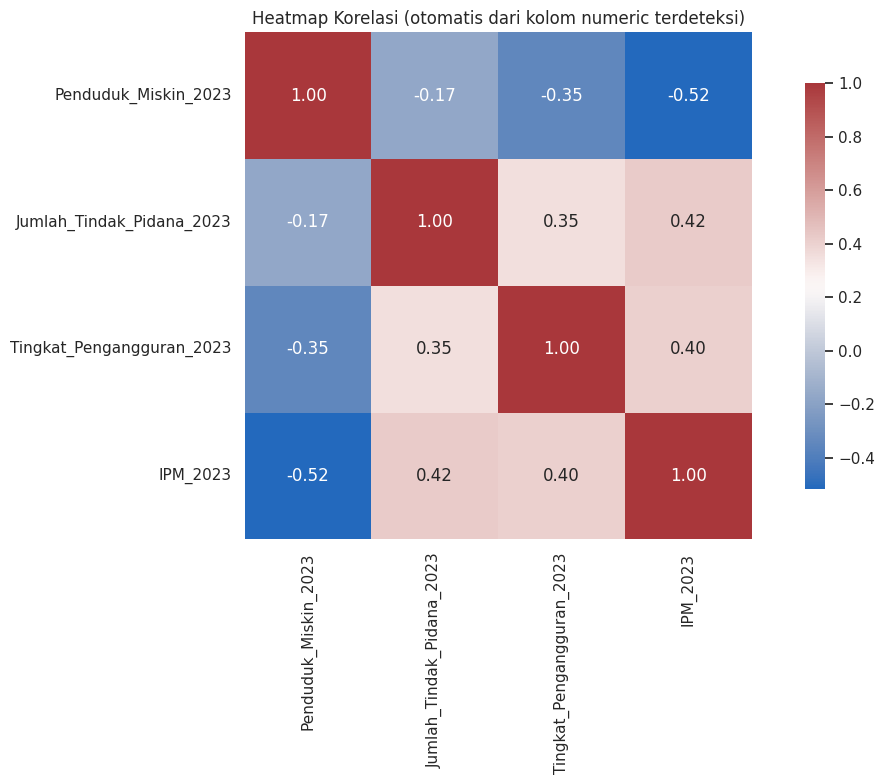

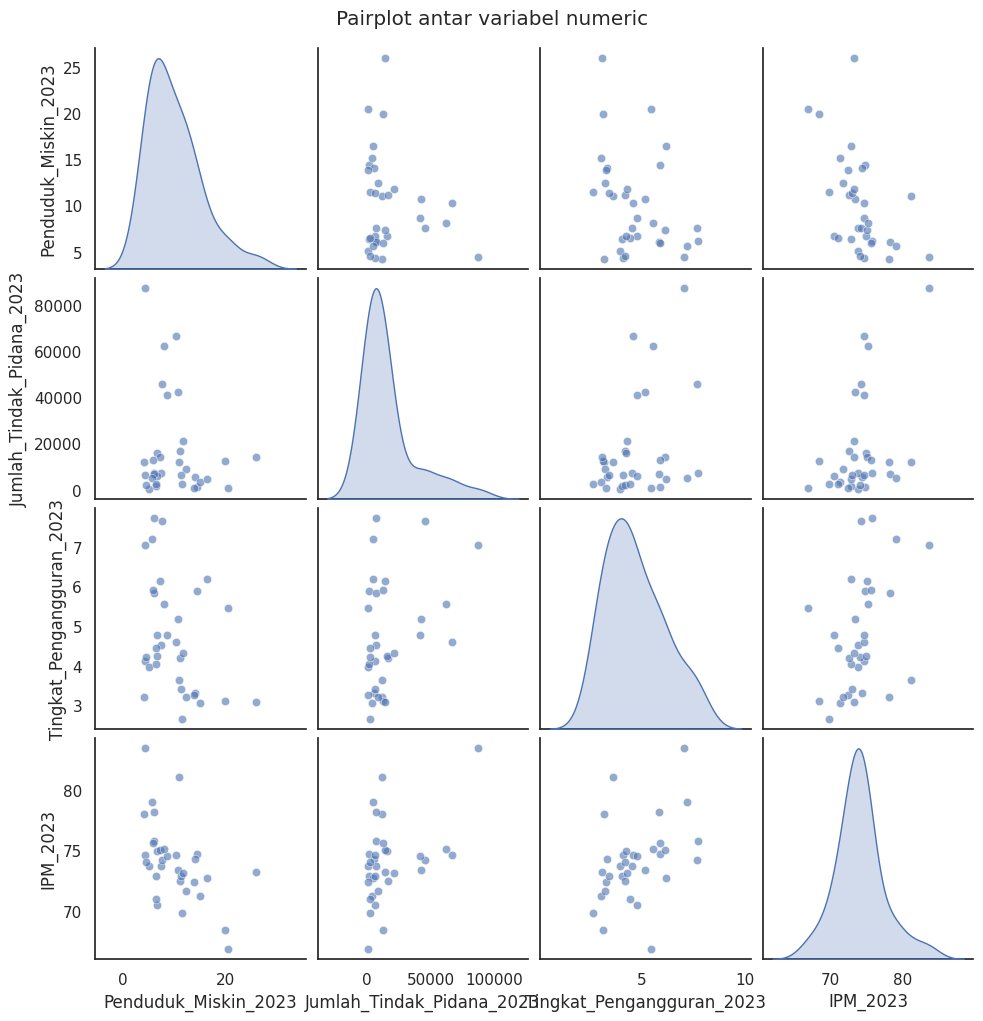


Deskriptif statistik (kolom numeric):
       Penduduk_Miskin_2023  Jumlah_Tindak_Pidana_2023  \
count             34.000000                  34.000000   
mean              10.089118               16390.323529   
std                5.183509               21231.863454   
min                4.250000                 442.000000   
25%                6.240000                3865.750000   
50%                8.425000                7412.000000   
75%               12.252500               15399.000000   
max               26.030000               87426.000000   

       Tingkat_Pengangguran_2023   IPM_2023  
count                  34.000000  34.000000  
mean                    4.710000  74.052353  
std                     1.407609   3.291068  
min                     2.660000  66.840000  
25%                     3.465000  72.547500  
50%                     4.390000  73.910000  
75%                     5.770000  75.017500  
max                     7.740000  83.550000  

Selesai. Heatmap disimp

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# ------- path file (pakai path lokal yang ada) -------
file_path = "gabungan_belum_fix.xlsx" # Corrected file path

# ------- load data -------
df = pd.read_excel(file_path)

# tampilkan kolom awal untuk pengecekan cepat
print("Kolom dalam file:", list(df.columns))

# ------- helper: ubah series ke numeric dengan cleaning -------

def smart_to_numeric(s):
    """
    Bersihkan string-number menjadi numeric:
    - hilangkan '%' jika ada
    - deteksi apakah string menggunakan titik sebagai pemisah ribuan:
        pola seperti '11.916' atau '1.234.567' -> hilangkan semua titik
    - jika memakai koma sebagai desimal -> ubah ',' jadi '.'
    - fallback: coba to_numeric dengan errors='coerce'
    """
    s_orig = s.astype(str).str.strip()
    # kosongkan nilai yang benar-benar 'nan' str
    s_orig = s_orig.replace({'nan': np.nan, 'None': np.nan, 'none': np.nan})

    # hapus persen
    s = s_orig.str.replace('%', '', regex=False)

    # definisi fungsi pengecekan pola ribuan seperti 1.234 atau 12.345.678
    def is_thousands_pattern(x):
        if pd.isna(x):
            return False
        # hanya angka dan titik, tidak ada koma
        if ',' in x:
            return False
        return bool(re.match(r'^\d{1,3}(\.\d{3})+$', x))

    # cek apakah mayoritas non-null cocok pola ribuan
    non_null = s.dropna().head(500).astype(str)  # cek sample up to 500
    if len(non_null) > 0:
        matches = non_null.apply(is_thousands_pattern).sum()
        if matches / len(non_null) >= 0.6:  # ambang 60%
            # hapus semua titik (pemisah ribuan)
            s_clean = s.str.replace('.', '', regex=False)
            # setelah hapus titik, ganti koma jadi titik kalau ada
            s_clean = s_clean.str.replace(',', '.', regex=False)
            return pd.to_numeric(s_clean, errors='coerce')

    # jika tidak dominantly thousands-pattern:
    # 1) ubah koma desimal -> titik
    s2 = s.str.replace(',', '.', regex=False)
    # 2) jika ada karakter lain non-digit/dot, buang (tapi hati-hati dengan minus dan dot)
    s2 = s2.str.replace(r'[^0-9.\-]', '', regex=True)
    return pd.to_numeric(s2, errors='coerce')


# deteksi kolom yang mungkin numeric (kecuali kolom provinsi)
id_cols = [c for c in df.columns if c.lower() in ("provinsi", "prov", "nama_provinsi")]
print("Kolom identitas terdeteksi (tidak akan dipaksa numeric):", id_cols)

candidate_cols = [c for c in df.columns if c not in id_cols]

# buat salinan untuk di-convert
df_clean = df.copy()

converted = {}
for col in candidate_cols:
    series_converted = smart_to_numeric(df_clean[col])
    nonnull_before = df_clean[col].notna().sum()
    nonnull_after = series_converted.notna().sum()
    converted[col] = {
        "converted_nonnull": nonnull_after,
        "original_nonnull": nonnull_before
    }
    if nonnull_after > 0:
        df_clean[col + "_num"] = series_converted
    else:
        # tidak bisa convert, biarkan saja
        df_clean[col + "_num"] = np.nan

# tampilkan ringkasan konversi
print("\nRingkasan konversi (kolom: converted_nonnull / original_nonnull):")
for k, v in converted.items():
    print(f"{k}: {v['converted_nonnull']} / {v['original_nonnull']}")


numeric_cols = [c for c in df_clean.columns if c.endswith("_num") and df_clean[c].notna().sum() > 0]

# jika nama kolom aslinya ingin digunakan di heatmap, kita map ke nama asli
name_map = {c: c[:-4] for c in numeric_cols}  # hapus suffix _num dalam label

print("\nKolom numeric yang dipakai untuk korelasi:", [name_map[c] for c in numeric_cols])

if len(numeric_cols) < 2:
    raise ValueError("Tidak cukup kolom numeric untuk membuat heatmap korelasi (butuh minimal 2). "
                     "Periksa hasil konversi atau struktur file.")

df_nums = df_clean[numeric_cols].rename(columns=name_map)

# korelasi
corr = df_nums.corr()

print("\nMatriks korelasi:")
print(corr)

# plot heatmap korelasi
plt.figure(figsize=(8 + len(df_nums.columns), 6 + len(df_nums.columns)/2))
sns.set_theme(style="white")
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", square=True, cbar_kws={"shrink": .8})
plt.title("Heatmap Korelasi (otomatis dari kolom numeric terdeteksi)")
plt.tight_layout()
plt.savefig("heatmap_korelasi_gabungan.png", dpi=300)
plt.show()

#pairplot visual
try:
    sns.pairplot(df_nums.dropna(), diag_kind="kde", plot_kws={"alpha":0.6})
    plt.suptitle("Pairplot antar variabel numeric", y=1.02)
    plt.savefig("pairplot_gabungan.png", dpi=300)
    plt.show()
except Exception as e:
    print("Pairplot gagal dibuat (mungkin karena ukuran data). Error:", e)


print("\nDeskriptif statistik (kolom numeric):")
print(df_nums.describe())

df_nums.to_csv("gabungan_numeric_used_for_corr.csv", index=False)
print("\nSelesai. Heatmap disimpan sebagai 'heatmap_korelasi_gabungan.png'.\n"
      "File numeric yang dipakai disimpan sebagai 'gabungan_numeric_used_for_corr.csv'.")